In [76]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### Get past 30 days earthquake data from [earthquake.usgs.gov](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php) that is being updated every minute (live).
#### Lets import the dataset downloaded from here :- https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

In [77]:
df = pd.read_csv(r"C:\Users\sagar\Desktop\Analysis of Earthquake Prediction\Data\all_month_2025.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-02T16:45:57.880Z,38.840168,-122.811501,2.02,0.67,md,6.0,108.0,0.016620,0.00,...,2025-05-02T16:47:33.959Z,"8 km WNW of Cobb, CA",earthquake,0.55,3.050,0.370,8.0,automatic,nc,nc
1,2025-05-02T16:25:25.358Z,-57.357100,-67.462600,10.00,4.50,mb,27.0,146.0,3.907000,0.63,...,2025-05-02T16:41:33.040Z,"288 km S of Ushuaia, Argentina",earthquake,12.76,1.948,0.116,22.0,reviewed,us,us
2,2025-05-02T16:25:04.060Z,38.827999,-122.852669,1.82,2.33,md,55.0,57.0,0.003315,0.07,...,2025-05-02T16:32:18.805Z,"10 km NW of The Geysers, CA",earthquake,0.16,0.220,0.160,62.0,automatic,nc,nc
3,2025-05-02T16:16:53.190Z,38.837334,-122.820663,0.91,0.31,md,7.0,135.0,0.016190,0.04,...,2025-05-02T16:27:19.770Z,"9 km WNW of Cobb, CA",earthquake,0.49,1.230,0.210,7.0,automatic,nc,nc
4,2025-05-02T15:56:59.270Z,33.533167,-116.723333,5.68,0.68,ml,16.0,76.0,0.034200,0.14,...,2025-05-02T16:00:21.701Z,"5 km WSW of Anza, CA",earthquake,0.29,0.660,0.185,17.0,automatic,ci,ci


In [78]:
df.shape

(10125, 22)

In [79]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10125.000000,10125.000000,10125.000000,10125.000000,8664.000000,8664.000000,8661.000000,10125.000000,8058.000000,10125.000000,8646.000000,8663.000000
mean,38.471199,-106.881901,20.138396,1.527211,23.504732,110.665607,0.446658,0.258036,1.719802,2.192662,0.176999,19.374466
std,18.351187,72.504448,50.132922,1.284485,22.310460,63.843306,1.628220,0.271493,3.298289,5.179121,0.103574,33.383205
min,-65.172700,-179.950700,-3.410000,-1.320000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.524500,-144.649700,2.960000,0.730000,9.000000,63.000000,0.014590,0.080000,0.250000,0.450000,0.110000,7.000000
50%,38.806332,-120.991997,7.390000,1.270000,17.000000,93.115000,0.051930,0.160000,0.410000,0.720000,0.160000,12.000000
75%,50.990600,-115.606500,13.770000,1.980000,29.000000,145.250000,0.117100,0.330000,0.940000,1.635000,0.219000,22.000000
max,86.322700,179.999300,642.872000,7.400000,400.000000,359.000000,42.272000,3.830000,41.690000,68.600000,2.090000,802.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10125 non-null  object 
 1   latitude         10125 non-null  float64
 2   longitude        10125 non-null  float64
 3   depth            10125 non-null  float64
 4   mag              10125 non-null  float64
 5   magType          10125 non-null  object 
 6   nst              8664 non-null   float64
 7   gap              8664 non-null   float64
 8   dmin             8661 non-null   float64
 9   rms              10125 non-null  float64
 10  net              10125 non-null  object 
 11  id               10125 non-null  object 
 12  updated          10125 non-null  object 
 13  place            10125 non-null  object 
 14  type             10125 non-null  object 
 15  horizontalError  8058 non-null   float64
 16  depthError       10125 non-null  float64
 17  magError    

In [81]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1461
gap                1461
dmin               1464
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2067
depthError            0
magError           1479
magNst             1462
status                0
locationSource        0
magSource             0
dtype: int64

In [82]:
df.duplicated().sum()

0

##### Visualize latitude and longitude feature from 'df' dataframe to see where the points fall from the feature set

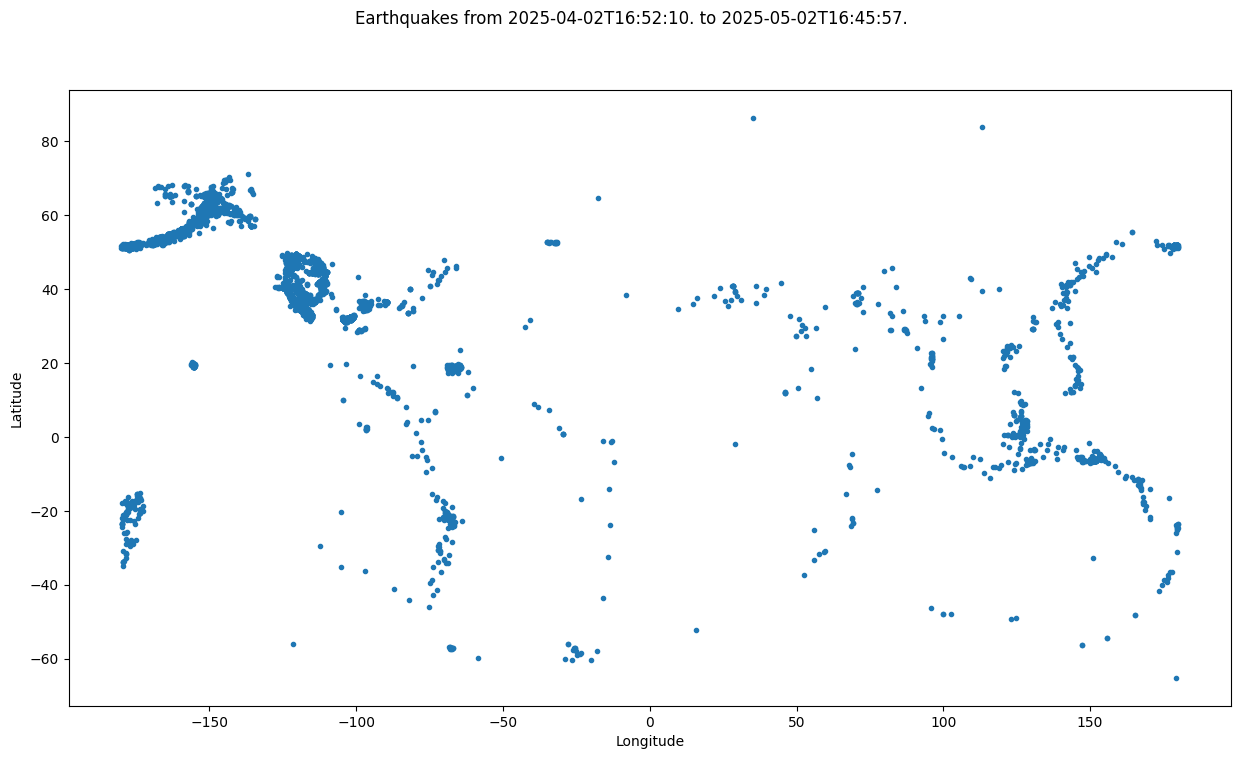

In [83]:
rounding_factor=10
fig, ax = plt.subplots(figsize=(15,8))

# latitude and longitude of earthquake site of samples.
plt.plot(np.round(df['longitude'],rounding_factor), 
         np.round(df['latitude'],rounding_factor),
         linestyle='none', marker='.')

plt.suptitle('Earthquakes from ' + str(np.min(df['time']))[:20] + ' to ' + str(np.max(df['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Clean up the data by first extracting only date from 'time' column by considering string[ : 10]. hence we can get desired date

In [84]:
df = df.sort_values('time', ascending=True)

#Date extraction
df['date'] = df['time'].str[0:10]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
10124,2025-04-02T16:52:10.910Z,56.261167,-159.498000,4.5100,0.71,ml,8.0,126.0,0.03885,0.29,...,"40 km N of Ivanof Bay, Alaska",earthquake,1.050000,1.610000,0.187146,8.0,reviewed,av,av,2025-04-02
10123,2025-04-02T16:53:40.200Z,56.273000,-159.490333,4.2800,0.28,ml,8.0,149.0,0.03700,0.32,...,"41 km N of Ivanof Bay, Alaska",earthquake,1.040000,1.890000,0.196244,8.0,reviewed,av,av,2025-04-02
10122,2025-04-02T16:56:16.130Z,45.333000,-121.695333,5.6900,0.45,ml,7.0,130.0,0.01094,0.06,...,"5 km NE of Government Camp, Oregon",earthquake,0.340000,0.410000,0.134902,4.0,reviewed,uw,uw,2025-04-02
10121,2025-04-02T16:58:21.883Z,31.629000,-104.533000,7.8687,1.30,ml,13.0,75.0,0.00000,0.10,...,"62 km SSW of Whites City, New Mexico",earthquake,2.238427,1.398148,0.000000,7.0,reviewed,tx,tx,2025-04-02
10120,2025-04-02T17:01:02.400Z,45.423667,-112.630333,1.7200,1.31,ml,9.0,101.0,0.06568,0.04,...,"23 km N of Dillon, Montana",earthquake,1.000000,1.240000,0.199681,17.0,reviewed,mb,mb,2025-04-02


In [85]:
#place extraction
newdf = df['place'].str.split(', ', expand=True)
newdf.head()

,0,1,2
10124,40 km N of Ivanof Bay,Alaska,None
10123,41 km N of Ivanof Bay,Alaska,None
10122,5 km NE of Government Camp,Oregon,None
10121,62 km SSW of Whites City,New Mexico,None
10120,23 km N of Dillon,Montana,None


In [86]:
df['place'] = newdf[1]
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]
df.head()

,date,latitude,longitude,depth,mag,place
10124,2025-04-02,56.261167,-159.498000,4.5100,0.71,Alaska
10123,2025-04-02,56.273000,-159.490333,4.2800,0.28,Alaska
10122,2025-04-02,45.333000,-121.695333,5.6900,0.45,Oregon
10121,2025-04-02,31.629000,-104.533000,7.8687,1.30,New Mexico
10120,2025-04-02,45.423667,-112.630333,1.7200,1.31,Montana


In [87]:
print('total locations:',len(set(df['place'])))

total locations: 100


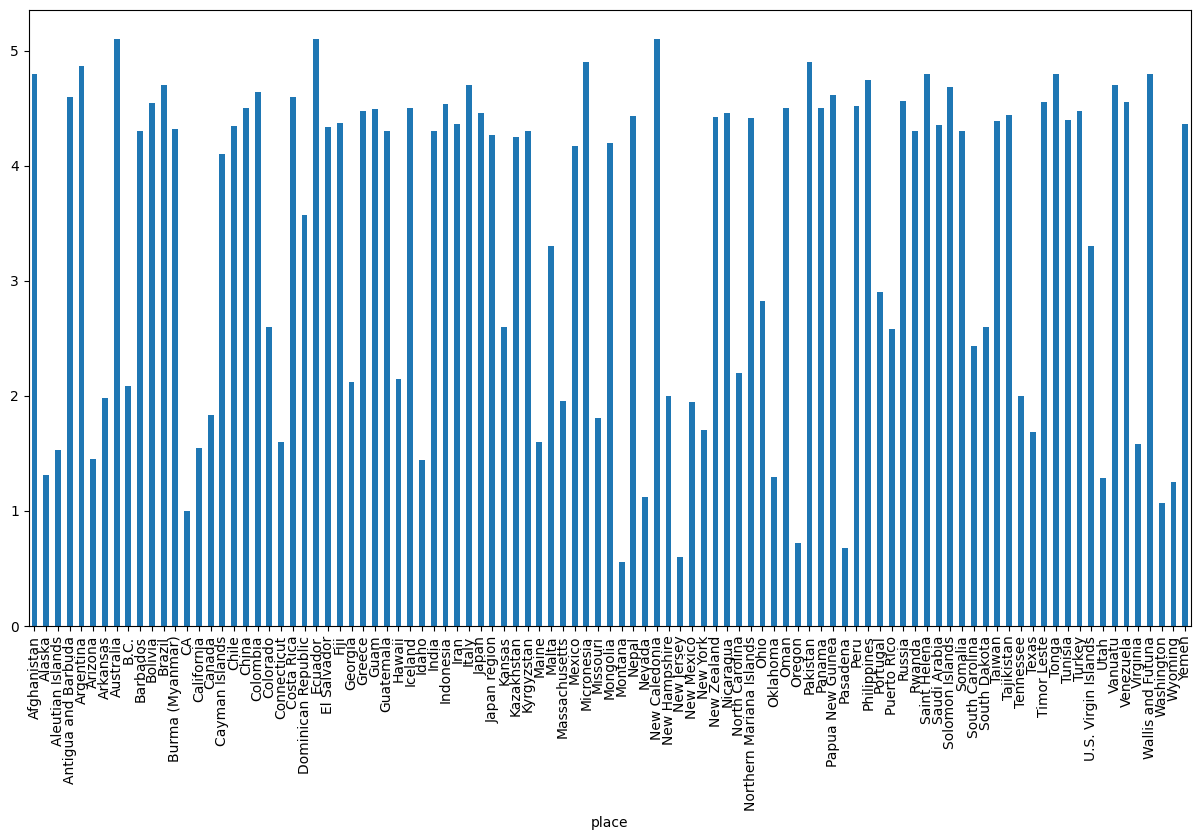

In [88]:
df.groupby(['place'])['mag'].mean().plot(kind='bar',figsize=(15,8));

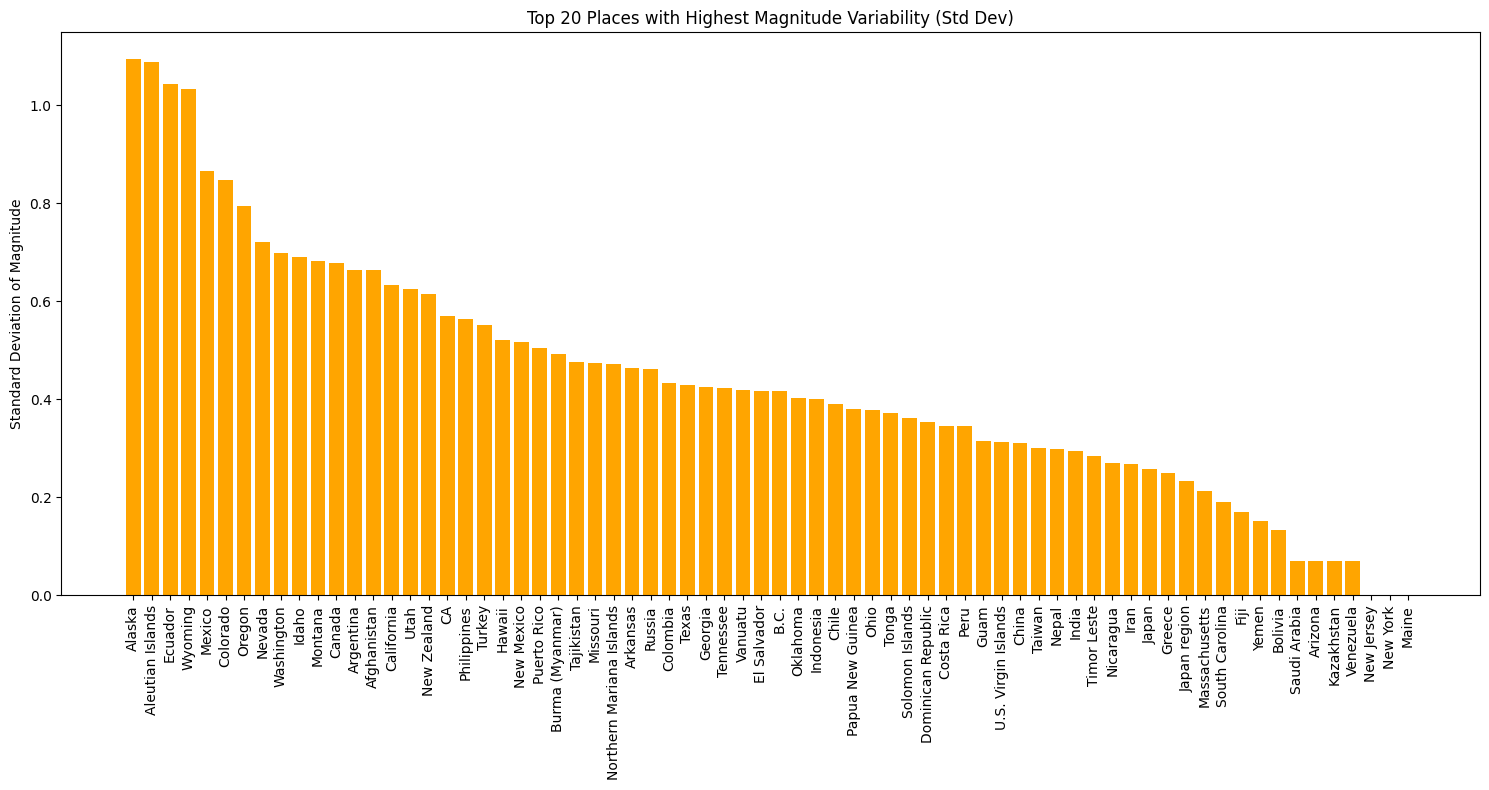

In [ ]:
# Compute mean and std dev of magnitude for each place
place_mag_stats = df.groupby('place')['mag'].agg(['mean', 'std']).reset_index()
place_mag_stats = place_mag_stats.dropna()

# Plot top 20 most variable places by std dev
top_std_places = place_mag_stats.sort_values('std', ascending=False)
plt.figure(figsize=(15, 8))
plt.bar(top_std_places['place'], top_std_places['std'], color='orange')
plt.xticks(rotation=90)
plt.title("Top 20 Places with Highest Magnitude Variability (Std Dev)")
plt.ylabel("Standard Deviation of Magnitude")
plt.tight_layout()
plt.show()


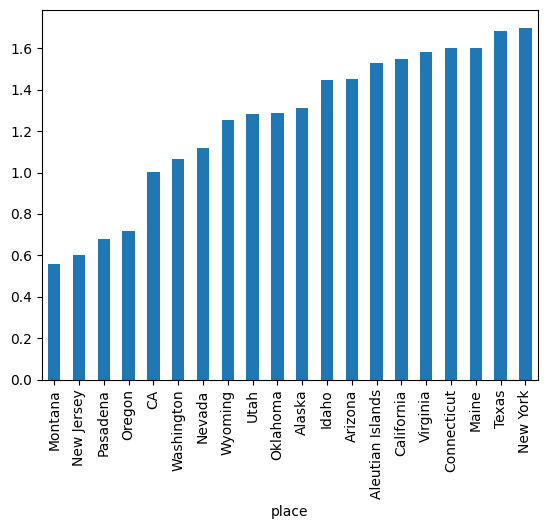

In [89]:
df.groupby(['place'])['mag'].mean().nsmallest(20).plot(kind='bar');

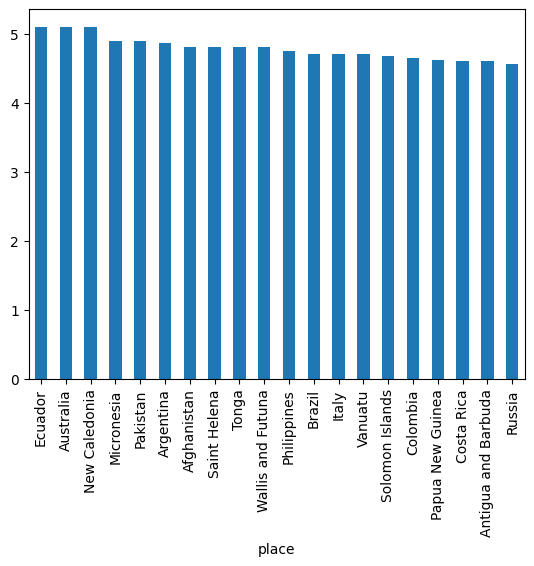

In [90]:
df.groupby(['place'])['mag'].mean().nlargest(20).plot(kind='bar');

##### Lets consider 3 as threshold for how high the earthquake has hit and lets visualise countries with more than 3 magnitude.

In [91]:
more_dangerous_places=df.groupby('place')['mag'].mean()
more_dangerous_places=more_dangerous_places[more_dangerous_places>3]

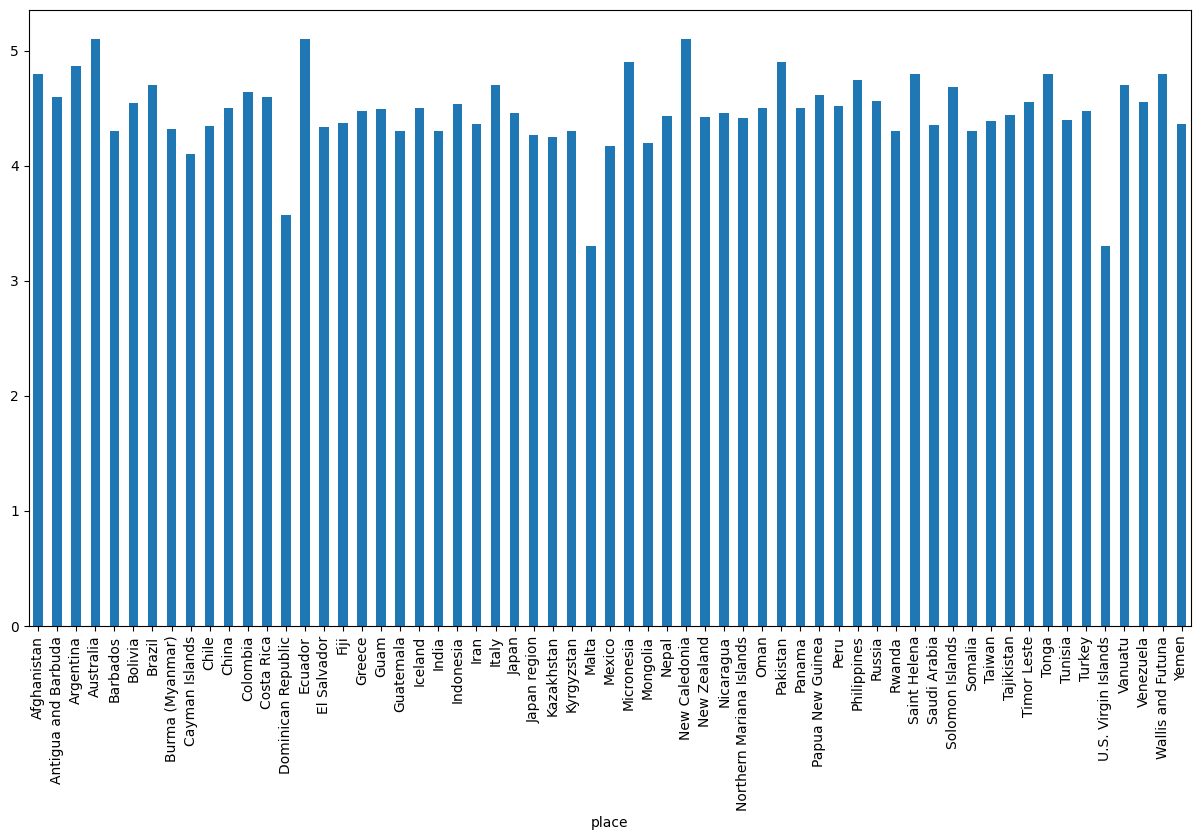

In [92]:
more_dangerous_places.plot(kind='bar',figsize= (15,8));

In [93]:
# calculate mean latitude and longitude for simplified locations

df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords = df_coords[['place', 'latitude', 'longitude']]

In [94]:
df_coords.head()

,place,latitude,longitude
0,Afghanistan,36.112533,70.576117
1,Alaska,58.438197,-151.438320
2,Aleutian Islands,51.714728,178.506271
3,Antigua and Barbuda,17.617000,-62.041000
4,Argentina,-43.274089,-67.607357


In [95]:
df = df[['date', 'depth', 'mag', 'place']]
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])

In [96]:
print('total locations:',len(set(df['place'])))

total locations: 99


In [97]:
print(set(df['place']))

{'Cayman Islands', 'Guam', 'Nicaragua', 'Nepal', 'Burma (Myanmar)', 'Connecticut', 'Timor Leste', 'Iran', 'Ecuador', 'Canada', 'Washington', 'Missouri', 'Colorado', 'New Zealand', 'Wyoming', 'South Dakota', 'Colombia', 'Nevada', 'B.C.', 'Maine', 'Montana', 'Italy', 'Russia', 'Ohio', 'Somalia', 'Chile', 'Virginia', 'Papua New Guinea', 'South Carolina', 'Vanuatu', 'Tennessee', 'Mongolia', 'North Carolina', 'Costa Rica', 'El Salvador', 'Antigua and Barbuda', 'Fiji', 'New York', 'Iceland', 'Pasadena', 'Australia', 'Hawaii', 'Tonga', 'Japan region', 'Arkansas', 'Utah', 'New Mexico', 'New Hampshire', 'Dominican Republic', 'Tunisia', 'Saint Helena', 'Saudi Arabia', 'Oregon', 'Taiwan', 'Peru', 'Arizona', 'Malta', 'Portugal', 'Yemen', 'Turkey', 'Indonesia', 'U.S. Virgin Islands', 'Panama', 'Greece', 'India', 'Barbados', 'Oman', 'Guatemala', 'Massachusetts', 'Aleutian Islands', 'Bolivia', 'CA', 'Pakistan', 'California', 'Venezuela', 'Northern Mariana Islands', 'Argentina', 'Kyrgyzstan', 'New Cal

In [98]:
df.head()

,date,depth,mag,place,latitude,longitude
0,2025-04-02,4.5100,0.71,Alaska,58.438197,-151.438320
1,2025-04-02,4.2800,0.28,Alaska,58.438197,-151.438320
2,2025-04-02,5.6900,0.45,Oregon,44.907152,-121.907214
3,2025-04-02,7.8687,1.30,New Mexico,31.782620,-104.202188
4,2025-04-02,1.7200,1.31,Montana,46.047520,-112.491018


#### Feature Engineering and Data wrangling

* Set rolling window size for future prediction based on past values with fixed window size in past
* I have created 6 new features based on rolling window size on average depth and average magnitude.
* A final outcome 'mag_outcome' has been defined as target values and the output is considered as shifted values from set rolling window of past days eg: '7'. 

In [ ]:
eq_tmp = df.copy()

#rolling window size
DAYS_OUT_TO_PREDICT = 7

# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    #avg. depth of 22 days rolling period and so on..(Potential Cycle Pattern: 22:App. Monthly, 15:Mid month, 7:Weekly)
    temp_df['depth_avg_22'] = temp_df['depth'].rolling(window=22,center=False).mean() 
    temp_df['depth_avg_15'] = temp_df['depth'].rolling(window=15,center=False).mean()
    temp_df['depth_avg_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['mag_avg_22'] = temp_df['mag'].rolling(window=22,center=False).mean() 
    temp_df['mag_avg_15'] = temp_df['mag'].rolling(window=15,center=False).mean()
    temp_df['mag_avg_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    # temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_OUT_TO_PREDICT * -1)
    # print(temp_df)

    # rolling standard deviation (variability tracking)
    # temp_df['depth_std_22'] = temp_df['depth'].rolling(window=22, center=False).std()
    # temp_df['depth_std_15'] = temp_df['depth'].rolling(window=15, center=False).std()
    # temp_df['depth_std_7'] = temp_df['depth'].rolling(window=7, center=False).std()
    # temp_df['mag_std_22'] = temp_df['mag'].rolling(window=22, center=False).std()
    # temp_df['mag_std_15'] = temp_df['mag'].rolling(window=15, center=False).std()
    # temp_df['mag_std_7'] = temp_df['mag'].rolling(window=7, center=False).std()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_OUT_TO_PREDICT * -1)
    print(temp_df)
    
    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
    
    eq_data_last_days_out.append(temp_df.tail(DAYS_OUT_TO_PREDICT))

    eq_data.append(temp_df)

            date  depth  mag           place  latitude  longitude  \
1601  2025-04-06   10.0  4.1  Cayman Islands   19.0253   -80.5545   

      depth_avg_22  depth_avg_15  depth_avg_7  mag_avg_22  mag_avg_15  \
1601           NaN           NaN          NaN         NaN         NaN   

      mag_avg_7  depth_std_22  depth_std_15  depth_std_7  mag_std_22  \
1601        NaN           NaN           NaN          NaN         NaN   

      mag_std_15  mag_std_7  mag_outcome  
1601         NaN        NaN          NaN  
            date    depth  mag place   latitude   longitude  depth_avg_22  \
767   2025-04-04   10.000  4.4  Guam  12.886811  144.385544           NaN   
1140  2025-04-05   19.964  4.6  Guam  12.886811  144.385544           NaN   
1223  2025-04-05  120.676  4.1  Guam  12.886811  144.385544           NaN   
1406  2025-04-06   10.000  4.4  Guam  12.886811  144.385544           NaN   
2891  2025-04-10   40.924  4.6  Guam  12.886811  144.385544           NaN   
3708  2025-04-12  121

In [100]:
eq_data_last_days_out

[            date  depth  mag           place  latitude  longitude  \
 1601  2025-04-06   10.0  4.1  Cayman Islands   19.0253   -80.5545   
 
       depth_avg_22  depth_avg_15  depth_avg_7  mag_avg_22  mag_avg_15  \
 1601           NaN           NaN          NaN         NaN         NaN   
 
       mag_avg_7  mag_outcome  depth_std_22  depth_std_15  depth_std_7  \
 1601        NaN          NaN           NaN           NaN          NaN   
 
       mag_std_22  mag_std_15  mag_std_7  
 1601         NaN         NaN        NaN  ,
             date    depth  mag place   latitude   longitude  depth_avg_22  \
 1223  2025-04-05  120.676  4.1  Guam  12.886811  144.385544           NaN   
 1406  2025-04-06   10.000  4.4  Guam  12.886811  144.385544           NaN   
 2891  2025-04-10   40.924  4.6  Guam  12.886811  144.385544           NaN   
 3708  2025-04-12  121.244  4.5  Guam  12.886811  144.385544           NaN   
 4441  2025-04-14  131.181  4.0  Guam  12.886811  144.385544           NaN   
 67

In [101]:
eq_data

[            date  depth  mag           place  latitude  longitude  \
 1601  2025-04-06   10.0  4.1  Cayman Islands   19.0253   -80.5545   
 
       depth_avg_22  depth_avg_15  depth_avg_7  mag_avg_22  mag_avg_15  \
 1601           NaN           NaN          NaN         NaN         NaN   
 
       mag_avg_7  mag_outcome  depth_std_22  depth_std_15  depth_std_7  \
 1601        NaN          NaN           NaN           NaN          NaN   
 
       mag_std_22  mag_std_15  mag_std_7  
 1601         NaN         NaN        NaN  ,
             date    depth  mag place   latitude   longitude  depth_avg_22  \
 767   2025-04-04   10.000  4.4  Guam  12.886811  144.385544           NaN   
 1140  2025-04-05   19.964  4.6  Guam  12.886811  144.385544           NaN   
 1223  2025-04-05  120.676  4.1  Guam  12.886811  144.385544           NaN   
 1406  2025-04-06   10.000  4.4  Guam  12.886811  144.385544           NaN   
 2891  2025-04-10   40.924  4.6  Guam  12.886811  144.385544           NaN   
 37

In [102]:
# concat all location-based dataframes into master dataframe
eq_all = pd.concat(eq_data)
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome,depth_std_22,depth_std_15,depth_std_7,mag_std_22,mag_std_15,mag_std_7
1601,2025-04-06,10.000,4.1,Cayman Islands,19.025300,-80.554500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,2025-04-04,10.000,4.4,Guam,12.886811,144.385544,NaN,NaN,NaN,NaN,NaN,NaN,4.428571,NaN,NaN,NaN,NaN,NaN,NaN
1140,2025-04-05,19.964,4.6,Guam,12.886811,144.385544,NaN,NaN,NaN,NaN,NaN,NaN,4.485714,NaN,NaN,NaN,NaN,NaN,NaN
1223,2025-04-05,120.676,4.1,Guam,12.886811,144.385544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,2025-04-06,10.000,4.4,Guam,12.886811,144.385544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# remove any NaN fields
eq_all = eq_all[np.isfinite(eq_all['depth_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_outcome'])]

In [104]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome,depth_std_22,depth_std_15,depth_std_7,mag_std_22,mag_std_15,mag_std_7
4498,2025-04-14,10.916,1.80,Canada,50.695181,-118.758364,3.986182,4.942400,2.480857,1.940909,2.097333,1.758571,1.597143,7.257133,8.053149,4.866186,0.663719,0.704500,0.467954
4999,2025-04-15,-1.500,2.05,Canada,50.695181,-118.758364,3.950273,4.175733,2.299429,1.974545,2.047333,1.727143,1.604286,7.283383,8.084612,5.005774,0.648806,0.677152,0.434040
5019,2025-04-15,-0.250,0.79,Canada,50.695181,-118.758364,3.960727,4.174400,2.365143,1.941364,1.972667,1.615714,1.752857,7.276884,8.085393,4.962515,0.690488,0.751089,0.562283
5204,2025-04-16,-0.040,1.55,Canada,50.695181,-118.758364,3.991182,2.711733,1.205143,1.947273,1.889333,1.720000,1.828571,7.257782,6.473591,4.310168,0.686358,0.721501,0.445720
5296,2025-04-16,9.998,1.90,Canada,50.695181,-118.758364,3.883818,3.078267,2.666286,1.927727,1.809333,1.697143,1.841429,7.144677,6.732543,5.350629,0.681042,0.639547,0.429174


Location after Feature Engineering

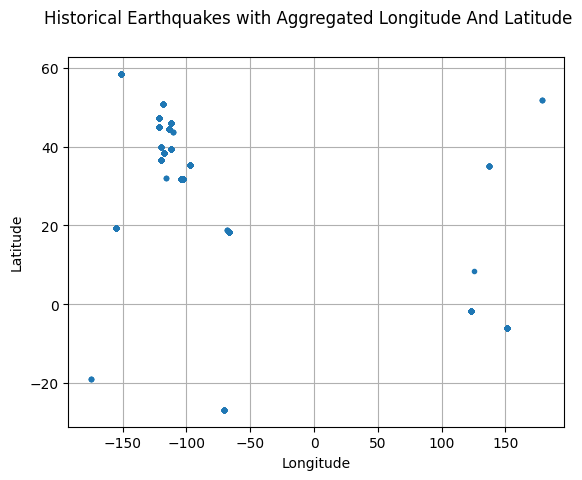

In [105]:
plt.plot(eq_all['longitude'], 
         eq_all['latitude'],
         linestyle='none', marker='.')
plt.suptitle('Historical Earthquakes with Aggregated Longitude And Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [106]:
# keep our live data for predictions
eq_data_last_days_out = pd.concat(eq_data_last_days_out)

eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['mag_avg_22'])]
predict_unknown=eq_data_last_days_out

In [107]:
# here 'mag_outcome' has NaN because these are future outcome event to be predicted live or data that has not yet been witnessed
predict_unknown

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome,depth_std_22,depth_std_15,depth_std_7,mag_std_22,mag_std_15,mag_std_7
9363,2025-04-30,17.115,1.90,Canada,50.695181,-118.758364,3.679955,4.154333,2.080714,1.766818,1.886000,1.621429,NaN,7.565850,8.533897,6.651660,0.548864,0.518264,0.659278
9493,2025-04-30,-0.710,1.12,Canada,50.695181,-118.758364,3.658136,4.122333,2.032143,1.734091,1.812667,1.491429,NaN,7.578345,8.552391,6.673743,0.565506,0.544773,0.654992
9500,2025-04-30,65.500,2.30,Canada,50.695181,-118.758364,6.139227,8.504333,11.572143,1.756818,1.831333,1.482857,NaN,15.185157,17.897035,24.655461,0.578186,0.557044,0.641995
9540,2025-04-30,-0.370,2.06,Canada,50.695181,-118.758364,6.190591,7.578333,11.592143,1.757273,1.828667,1.491429,NaN,15.159978,17.978139,24.644081,0.578431,0.555760,0.650395
9734,2025-05-01,30.941,3.00,Canada,50.695181,-118.758364,7.608364,9.656400,16.113714,1.857727,1.906667,1.712857,NaN,15.966040,18.794105,24.912873,0.594137,0.632734,0.863032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2025-04-30,6.700,1.01,Idaho,44.513816,-114.063960,5.700136,5.902333,8.043571,1.554545,1.498667,1.961429,NaN,4.784053,4.146979,5.225874,0.867079,0.889581,0.727402
9496,2025-04-30,1.230,1.86,Idaho,44.513816,-114.063960,5.733318,5.577667,6.199714,1.576364,1.489333,1.827143,NaN,4.748668,4.317527,4.989234,0.868516,0.884667,0.626570
9502,2025-04-30,7.360,2.34,Idaho,44.513816,-114.063960,5.660591,5.809667,5.734000,1.570000,1.571333,1.790000,NaN,4.708984,4.313284,4.648367,0.862068,0.903793,0.579022
9569,2025-05-01,4.980,1.19,Idaho,44.513816,-114.063960,5.851500,5.933000,4.758571,1.568636,1.594000,1.602857,NaN,4.585206,4.257274,3.800410,0.862672,0.888545,0.519991


##### Considered magnitude above 2.5 as dangerous hence prediction outcome as '1' elso '0'.

In [108]:
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
print(eq_all['mag_outcome'].describe())
eq_all['mag_outcome'].value_counts()

count    8874.00000
mean        0.04947
std         0.21686
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: mag_outcome, dtype: float64


mag_outcome
0    8435
1     439
Name: count, dtype: int64

In [109]:
eq_all

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome,depth_std_22,depth_std_15,depth_std_7,mag_std_22,mag_std_15,mag_std_7
4498,2025-04-14,10.916,1.80,Canada,50.695181,-118.758364,3.986182,4.942400,2.480857,1.940909,2.097333,1.758571,0,7.257133,8.053149,4.866186,0.663719,0.704500,0.467954
4999,2025-04-15,-1.500,2.05,Canada,50.695181,-118.758364,3.950273,4.175733,2.299429,1.974545,2.047333,1.727143,0,7.283383,8.084612,5.005774,0.648806,0.677152,0.434040
5019,2025-04-15,-0.250,0.79,Canada,50.695181,-118.758364,3.960727,4.174400,2.365143,1.941364,1.972667,1.615714,0,7.276884,8.085393,4.962515,0.690488,0.751089,0.562283
5204,2025-04-16,-0.040,1.55,Canada,50.695181,-118.758364,3.991182,2.711733,1.205143,1.947273,1.889333,1.720000,0,7.257782,6.473591,4.310168,0.686358,0.721501,0.445720
5296,2025-04-16,9.998,1.90,Canada,50.695181,-118.758364,3.883818,3.078267,2.666286,1.927727,1.809333,1.697143,0,7.144677,6.732543,5.350629,0.681042,0.639547,0.429174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2025-04-27,2.070,0.21,Idaho,44.513816,-114.063960,4.553545,4.606533,3.732857,1.215455,1.364667,0.964286,0,3.552958,4.312693,1.403908,0.843636,0.882932,0.832163
8838,2025-04-28,14.137,2.80,Idaho,44.513816,-114.063960,5.024318,5.515667,5.198143,1.280000,1.459333,1.205714,0,4.091001,4.795525,4.183715,0.908641,0.957657,1.087472
8950,2025-04-28,10.620,2.60,Idaho,44.513816,-114.063960,5.295682,5.626333,6.268143,1.334091,1.467333,1.455714,0,4.259519,4.898731,4.511575,0.951173,0.967245,1.188526
8953,2025-04-28,11.808,2.50,Idaho,44.513816,-114.063960,5.606500,6.361533,7.045000,1.454091,1.552667,1.655714,0,4.478480,4.946746,4.976293,0.922443,0.999782,1.235555


Text(0.5, 0, 'Earthquake_outcome')

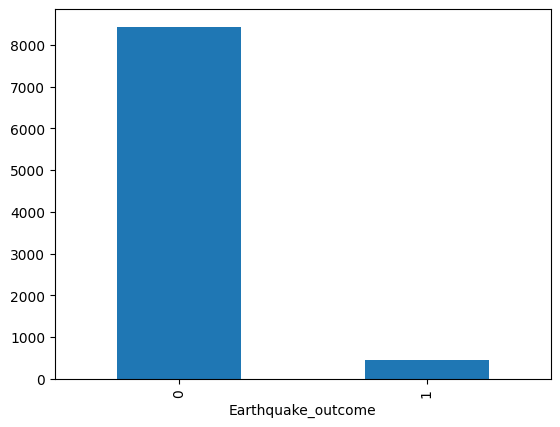

In [110]:
eq_all['mag_outcome'].value_counts().plot(kind='bar',)
plt.xlabel('Earthquake_outcome')

##### Save the data of of fixed rolling window and live unknown prediction data in sql database using sql engine 

In [111]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Earthquakedata.db')
eq_all.to_sql('Earthquake_features', engine, index=False,if_exists='replace')

8874

In [112]:
engine = create_engine('sqlite:///Earthquakedata_predict.db')
predict_unknown.to_sql('Earthquake_predict', engine, index=False,if_exists='replace')

184